In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.patches as patches

mpl.rcParams['font.family'] = 'DejaVu Sans'

In [13]:
# 数据
TP = 46200  # True Positive
TN = 47400  # True Negative  
FP = 1740   # False Positive
FN = 2964   # False Negative

# 构建混淆矩阵
cm = np.array([[TP, FN], 
               [FP, TN]])

# 计算性能指标
total = TP + TN + FP + FN
accuracy = (TP + TN) / total
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)

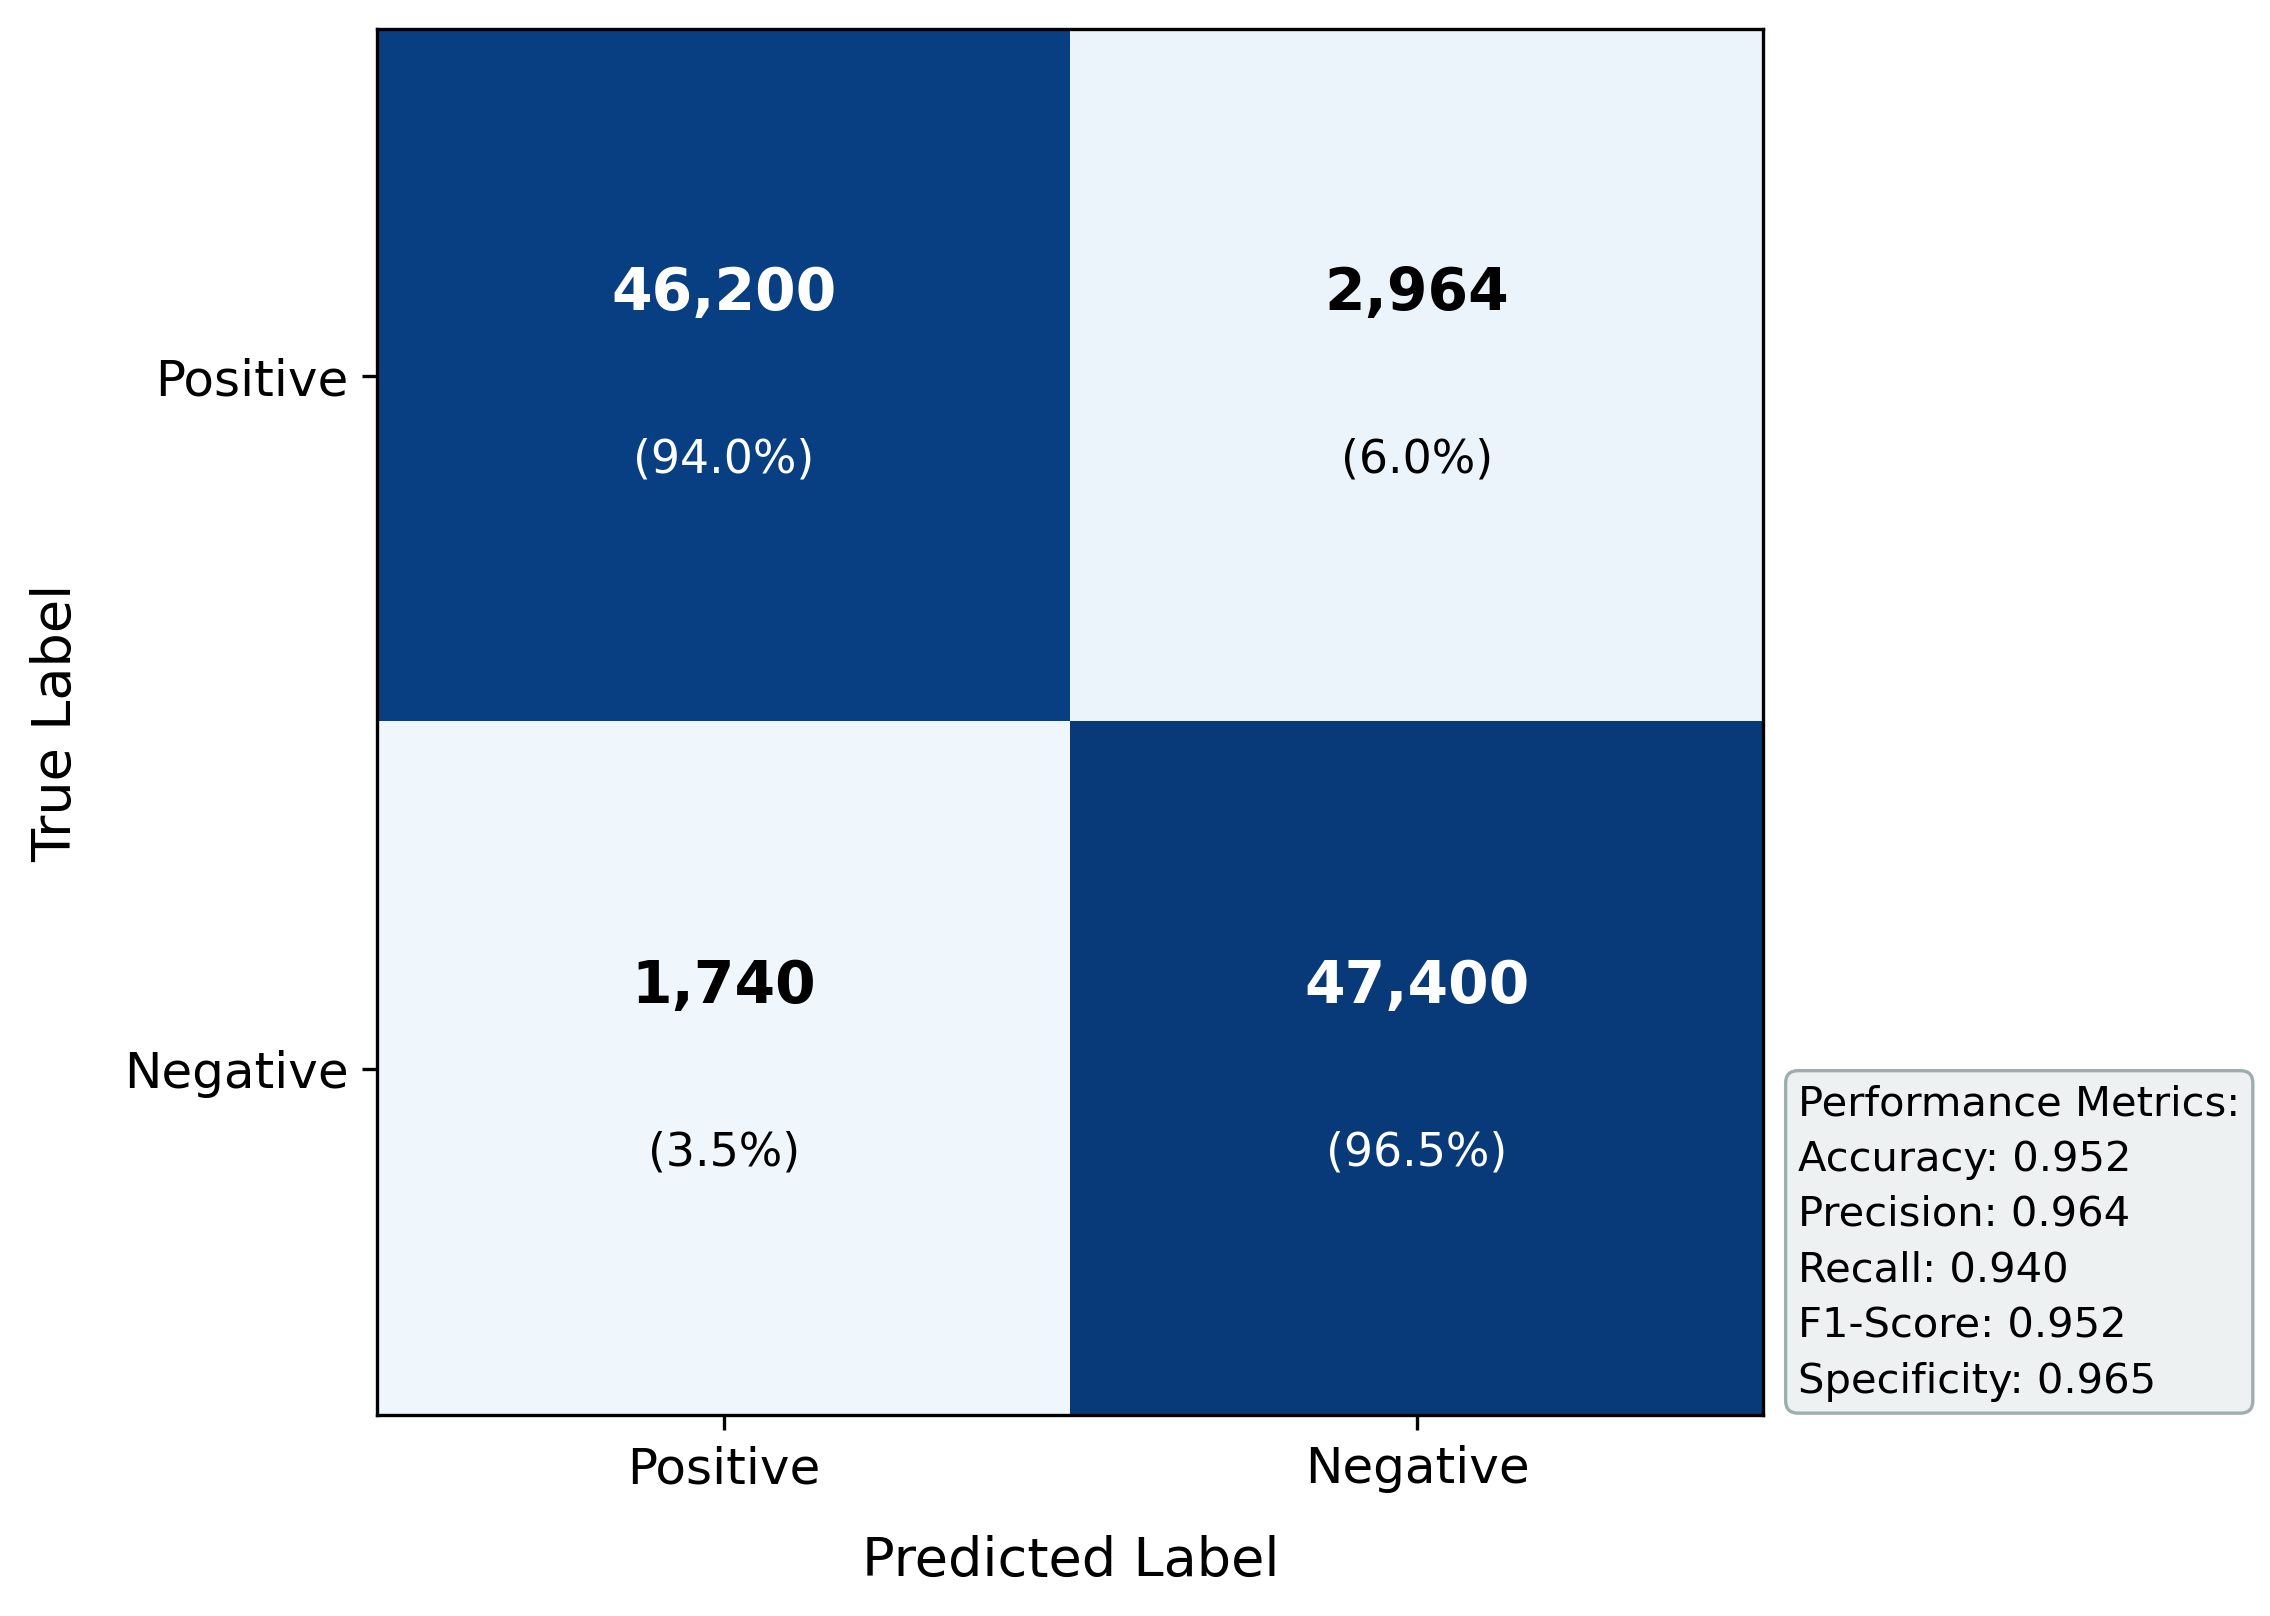

In [ ]:
# 创建图形
fig, ax = plt.subplots(figsize=(7, 6), dpi=300)

# 配色方案
cmap = plt.cm.Blues
norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 绘制热图
im = ax.imshow(norm_cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1, aspect='equal')

# 设置刻度
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
ax.set_yticklabels(['Positive', 'Negative'], fontsize=12)

#设置轴标签
ax.set_xlabel('Predicted Label', fontsize=13, fontweight='medium', labelpad=10)
ax.set_ylabel('True Label', fontsize=13, fontweight='medium', labelpad=10)

# 在每个单元格中添加数值和百分比
for i in range(2):
        for j in range(2):
                # 计算百分比
                percentage = cm[i, j] / cm[i].sum() * 100
                # 根据背景颜色选择文本颜色
                text_color = 'white' if norm_cm[i, j] > 0.5 else 'black'
                # 添加主要数值
                text1 = ax.text(j, i - 0.12, f'{cm[i, j]:,}',
                ha='center', va='center', fontsize=14,
                fontweight='bold', color=text_color)
                # 添加百分比
                text2 = ax.text(j, i + 0.12, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=11,
                color=text_color)

# 添加性能指标文本框
metrics_text = (
f'Performance Metrics:\n'
f'Accuracy: {accuracy:.3f}\n'
f'Precision: {precision:.3f}\n'
f'Recall: {recall:.3f}\n'
f'F1-Score: {f1_score:.3f}\n'
f'Specificity: {specificity:.3f}'
)

# 添加指标框
props = dict(boxstyle='round,pad=0.3', facecolor='#ecf0f1',
edgecolor='#95a5a6', linewidth=0.8, alpha=0.9)
ax.text(1.55, 1.25, metrics_text, transform=ax.transData,
fontsize=10, verticalalignment='center',
bbox=props, linespacing=1.5)

# 设置标题
# ax.set_title('CNN Model Performance on Test Set\nConfusion Matrix',
# fontsize=14, fontweight='bold', pad=20, color='#2c3e50')

# 调整布局
# ax.set_xlim(-0.7, 1.7)
# ax.set_ylim(1.7, -0.7)
# ax.tick_params(length=0)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# 调整整体布局
# plt.tight_layout()

# 保存高质量图片
plt.savefig('/proj/nobackup/hpc2nstor2024-028/zhychen/bin/software/ltr_checker/image/confusion_matrix_nature.png', dpi=300, bbox_inches='tight',
facecolor='white', edgecolor='none')

fig.show()